In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
auto=df[['age', 'sex', 'bmi', 'children','smoker','region', 'expenses']]

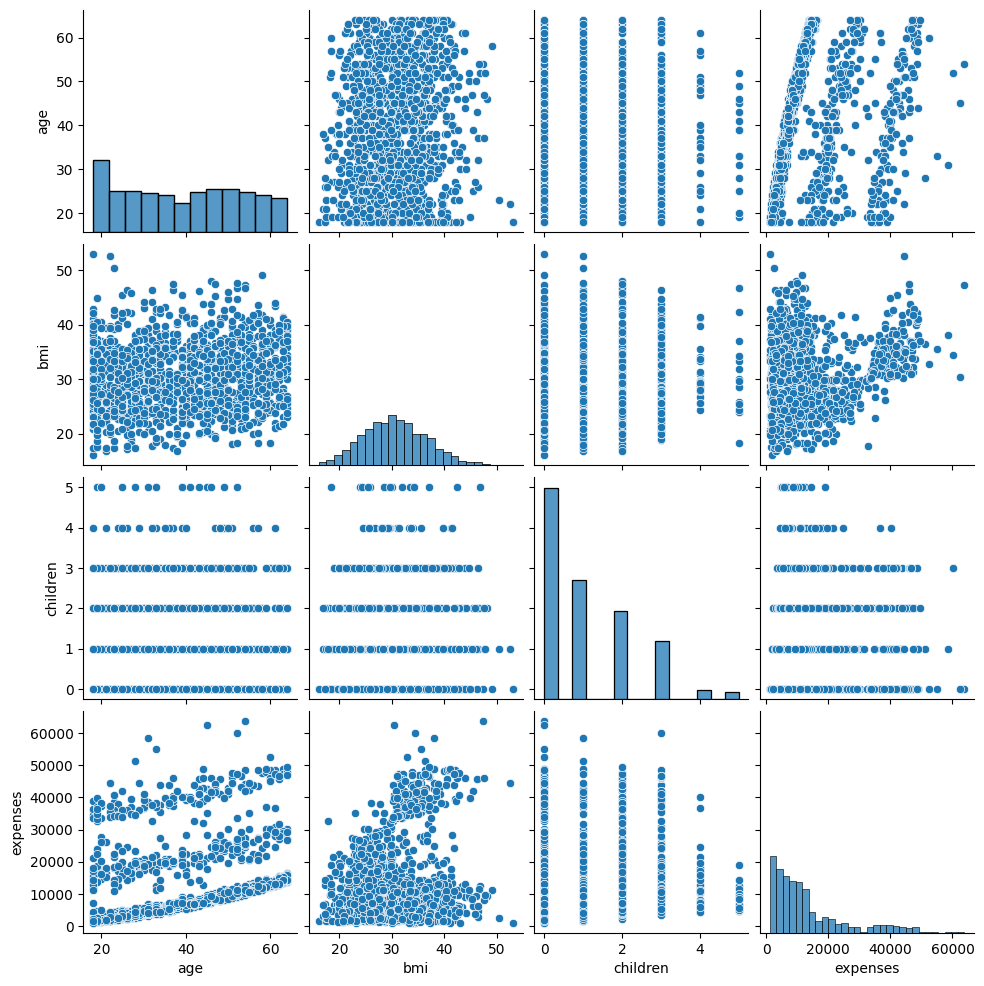

In [6]:
sns.pairplot(auto)

In [7]:
auto1=df[['age', 'bmi', 'expenses']]
auto1.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


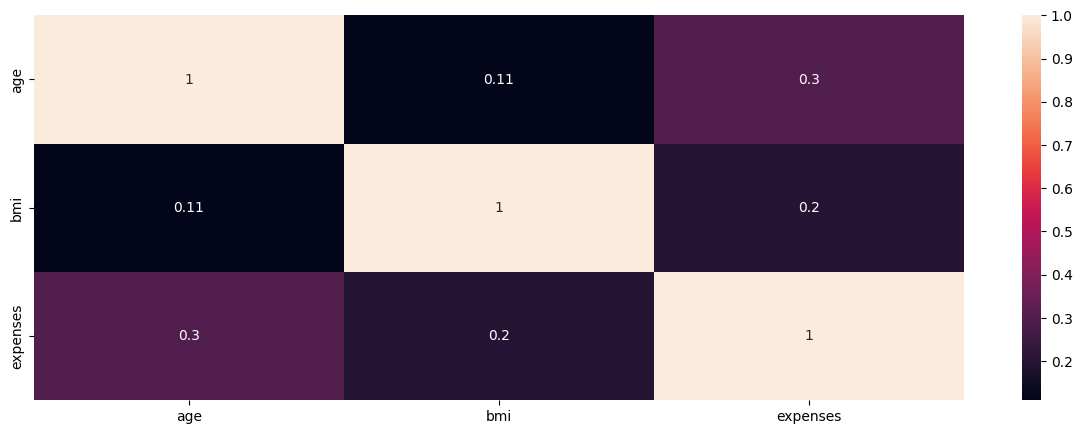

In [8]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()

In [9]:
auto

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [10]:
gender = pd.get_dummies(auto['sex'], drop_first = True)
gender

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [11]:
smoker1 = pd.get_dummies(auto['smoker'], drop_first = True)
smoker1

,yes
0,True
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [12]:
auto = pd.concat([auto, gender], axis = 1)
auto = pd.concat([auto, smoker1], axis = 1)

In [13]:
auto


,age,sex,bmi,children,smoker,region,expenses,male,yes
0,19,female,27.9,0,yes,southwest,16884.92,False,True
1,18,male,33.8,1,no,southeast,1725.55,True,False
2,28,male,33.0,3,no,southeast,4449.46,True,False
3,33,male,22.7,0,no,northwest,21984.47,True,False
4,32,male,28.9,0,no,northwest,3866.86,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,True,False
1334,18,female,31.9,0,no,northeast,2205.98,False,False
1335,18,female,36.9,0,no,southeast,1629.83,False,False
1336,21,female,25.8,0,no,southwest,2007.95,False,False


In [14]:
auto = auto.drop(['sex','region', 'smoker'],axis = 1)

In [15]:
auto

,age,bmi,children,expenses,male,yes
0,19,27.9,0,16884.92,False,True
1,18,33.8,1,1725.55,True,False
2,28,33.0,3,4449.46,True,False
3,33,22.7,0,21984.47,True,False
4,32,28.9,0,3866.86,True,False
...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,True,False
1334,18,31.9,0,2205.98,False,False
1335,18,36.9,0,1629.83,False,False
1336,21,25.8,0,2007.95,False,False


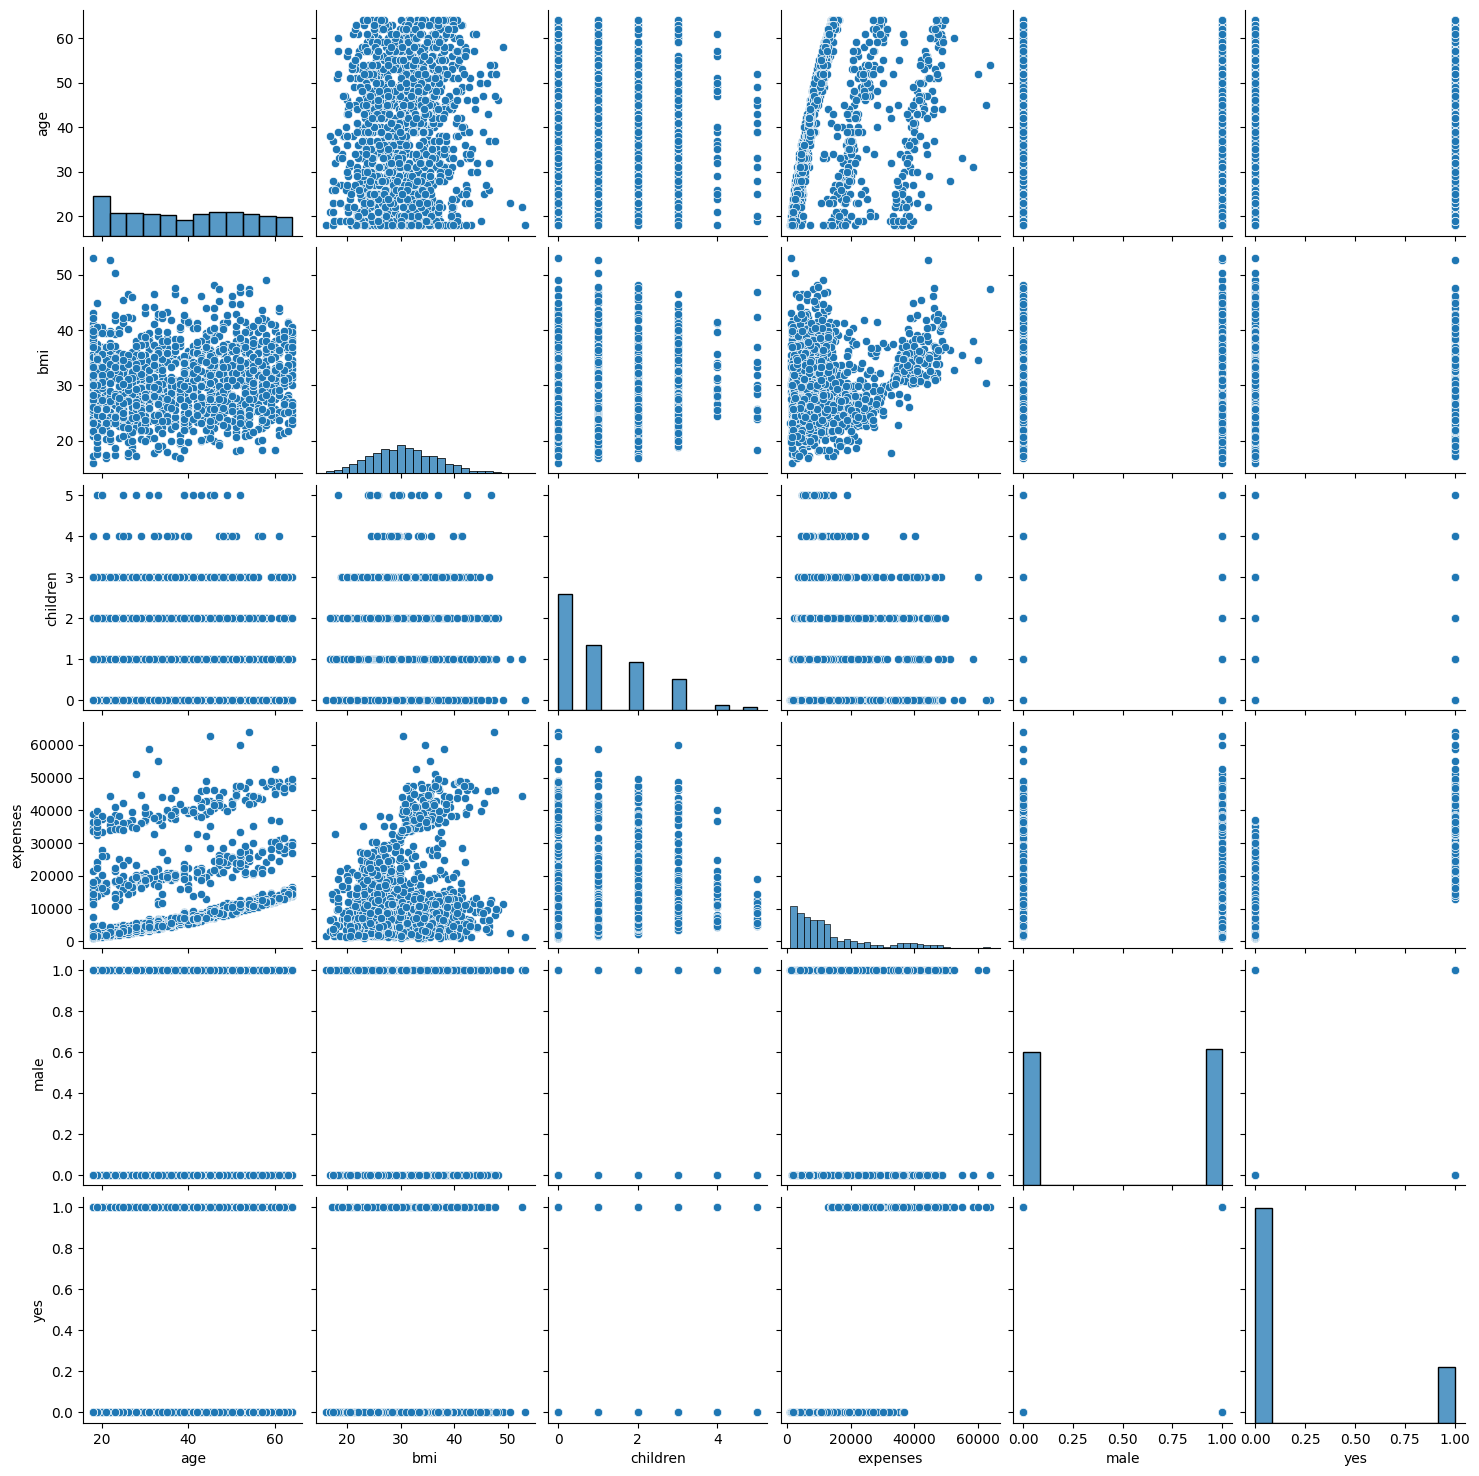

In [16]:
sns.pairplot(auto)

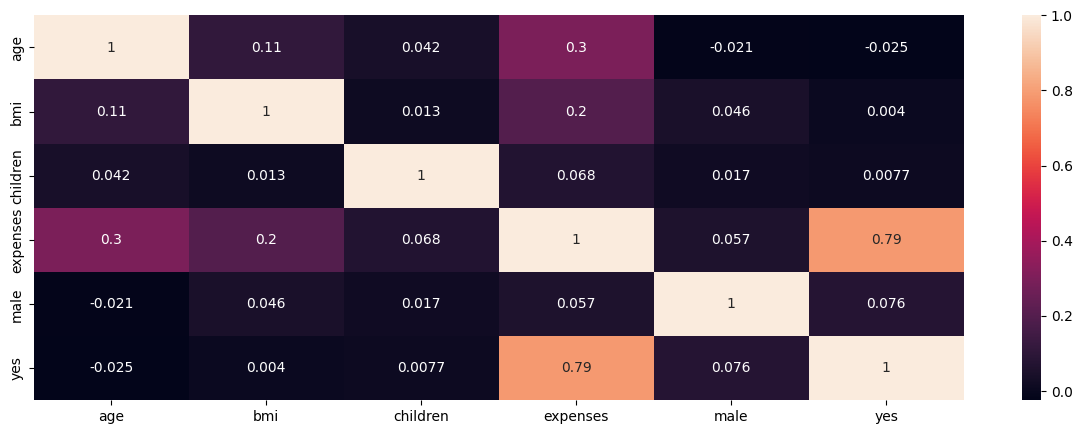

In [17]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [18]:
auto.columns
auto.rename(columns= {'male': 'sex', 'yes':'smoker'}, inplace=True)
auto.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex', 'smoker'], dtype='object')

In [24]:
auto['expenses'] = auto['expenses'].astype(int)

In [25]:
from sklearn.model_selection import train_test_split

# print(train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1))

# We specify this so that the train and test data set always have the same rows, respectively
# "auto" is the pandas dataframe passed as an array

df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [26]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['age', 'bmi', 'children', 'sex', 'smoker']]
y_train = df_train['expenses']

X_test = df_test[['age', 'bmi', 'children', 'sex', 'smoker']]
y_test = df_test['expenses']

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [27]:
data = df_test.iloc[20:21]
actual_expense = data['expenses']
data = data.drop(['expenses'],axis = 1)
data

,age,bmi,children,sex,smoker
315,52,33.3,0,True,False


In [28]:
print("Predicted expense",model.predict(data))
print("Actual expense",actual_expense)


Predicted expense [11927.77678754]
Actual expense 315    9722
Name: expenses, dtype: int64


In [29]:
# train data
X_train = df_train[['age', 'bmi', 'children', 'sex', 'smoker']]
y_train = df_train['expenses']

# test data
X_test = df_test[['age', 'bmi', 'children', 'sex', 'smoker']]
y_test = df_test['expenses']
# df_test_predict = X_train.iloc[0:1]

# for linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

# for logistic regression [throws error, so we converted dependent variable into int datatype]
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X_train)
# Y_poly = poly_reg.fit_transform(y_train)
pol_reg = LinearRegression()
poly_model = pol_reg.fit(X_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
## we will drop SALARY column and use it to predict from the model. Actual salary is for side by side comparison
data = df_test.iloc[21:22]
actual_expense = data['expenses']
data = data.drop(['expenses'],axis = 1)
data

,age,bmi,children,sex,smoker
725,30,39.1,3,False,True


In [32]:
#linear model test
print("Predicted Expense",lr_model.predict(data))
print("Actual Expenses",actual_expense)

Predicted Expense [33465.93185895]
Actual Expenses 725    40932
Name: expenses, dtype: int64


In [33]:
#logistic model test
print("Predicted Expense",lg_model.predict(data))
print("Actual Expenses",actual_expense)

Predicted Expense [35595]
Actual Expenses 725    40932
Name: expenses, dtype: int64


In [34]:
#polynomial regression model test
predicted_expense = poly_model.predict(poly_reg.fit_transform(data))
print("Predicted Expense",predicted_expense)
print("Actual Expenses",actual_expense)


Predicted Expense [34555.6535497]
Actual Expenses 725    40932
Name: expenses, dtype: int64


In [35]:
#train accuracy
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",poly_model.score(poly_reg.fit_transform(X_train), y_train)*100)

Linear regression =  75.09511790969854
Logistic regression =  13.456464379947231
Polynomial regression =  87.8462122689489


In [36]:
#test accuracy
print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",poly_model.score(poly_reg.fit_transform(X_test), y_test)*100)

Linear regression =  74.23355233159239
Logistic regression =  0.0
Polynomial regression =  37.19334761176242


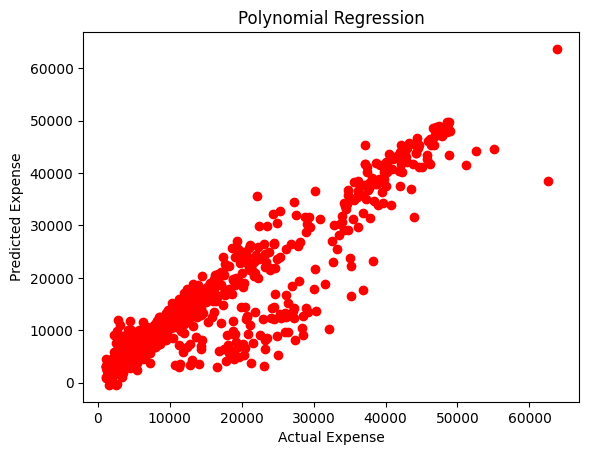

In [37]:
# Polynomial Regression
plt.scatter(y_train,poly_model.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual Expense')
plt.ylabel('Predicted Expense')
plt.title('Polynomial Regression')
plt.show()

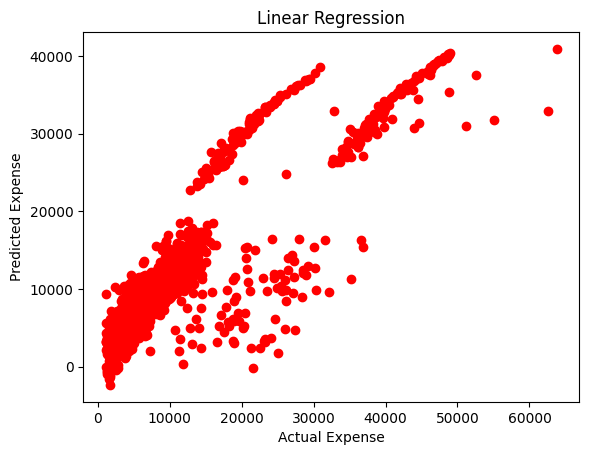

In [38]:
# Linear Regression
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual Expense')
plt.ylabel('Predicted Expense')
plt.title('Linear Regression')
plt.show()

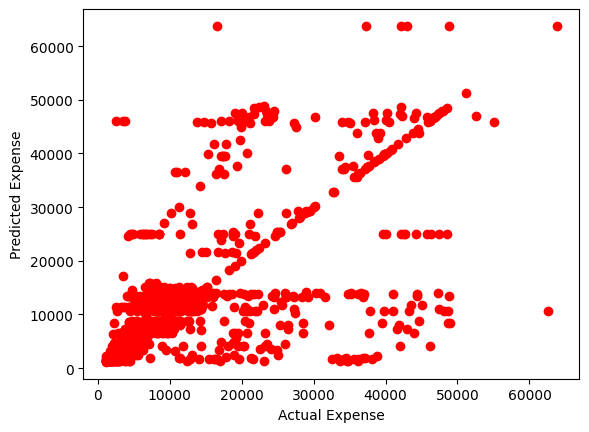

In [39]:
# Logistic Regression
plt.scatter(y_train,lg_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.xlabel('Actual Expense')
plt.ylabel('Predicted Expense')
plt.show()